Statistique observée (moyenne) : 4.828701438558171


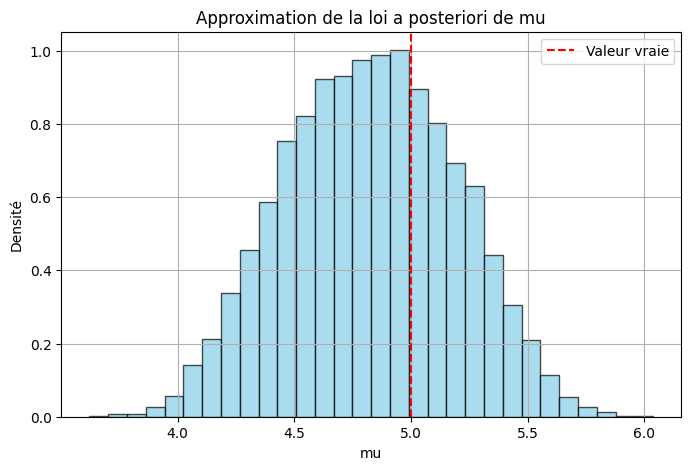

Nombre de paramètres acceptés : 9927 / 100000


In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # Seed pour la reproductibilité

mu_true = 5  # Paramètre vrai inconnu

n_obs = 20  # Nombre d'observations
y_obs = np.random.normal(loc=mu_true, scale=1, size=n_obs)  # Données observées

s_obs = np.mean(y_obs)  # Statistique résumée : moyenne des données
print("Statistique observée (moyenne) :", s_obs)

N = 100000  # Nombre d'échantillons proposés
epsilon = 0.5  # Seuil d'acceptation
accepted_thetas = []  # Liste des paramètres acceptés

for _ in range(N):
    theta = np.random.uniform(0, 10)  # Tirage depuis la prior (Uniforme sur [0, 10])
    y_sim = np.random.normal(loc=theta, scale=1, size=n_obs)  # Simulation de données
    s_sim = np.mean(y_sim)  # Statistique résumée simulée

    if abs(s_sim - s_obs) < epsilon:  # Critère d'acceptation
        accepted_thetas.append(theta)

plt.figure(figsize=(8, 5))
plt.hist(accepted_thetas, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='k')
plt.axvline(mu_true, color='red', linestyle='--', label='Valeur vraie')
plt.title('Approximation de la loi a posteriori de mu')
plt.xlabel('mu')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()

print(f"Nombre de paramètres acceptés : {len(accepted_thetas)} / {N}")


Statistique observée (moyenne) : 0.2734753251304383


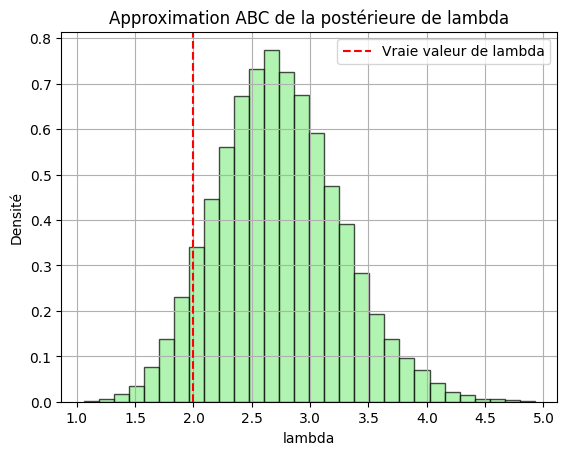

In [8]:
np.random.seed(42)

# Paramètre inconnu à estimer
lambda_true = 2.0

# Nombre de données
n_obs = 50

# Données observées : y = min(X, Z)
X_obs = np.random.exponential(1 / lambda_true, size=n_obs)
Z_obs = np.random.exponential(1, size=n_obs)
y_obs = np.minimum(X_obs, Z_obs)

# Statistique : moyenne
s_obs = np.mean(y_obs)
print("Statistique observée (moyenne) :", s_obs)
N = 1000000
epsilon = 0.01
accepted_lambdas = []

for _ in range(N):
    # 1. Tirer lambda depuis prior (par ex : Uniforme sur [0.1, 5])
    lam = np.random.uniform(0.1, 5)

    # 2. Simuler des X ~ Exp(lam), Z ~ Exp(1)
    X_sim = np.random.exponential(1 / lam, size=n_obs)
    Z_sim = np.random.exponential(1, size=n_obs)
    y_sim = np.minimum(X_sim, Z_sim)

    # 3. Comparer la moyenne des données simulées et observées
    s_sim = np.mean(y_sim)

    if abs(s_sim - s_obs) < epsilon:
        accepted_lambdas.append(lam)

plt.hist(accepted_lambdas, bins=30, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(lambda_true, color='red', linestyle='--', label='Vraie valeur de lambda')
plt.title("Approximation ABC de la postérieure de lambda")
plt.xlabel("lambda")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()


# ABC-MCMC

Statistique observée (moyenne) : 4.829


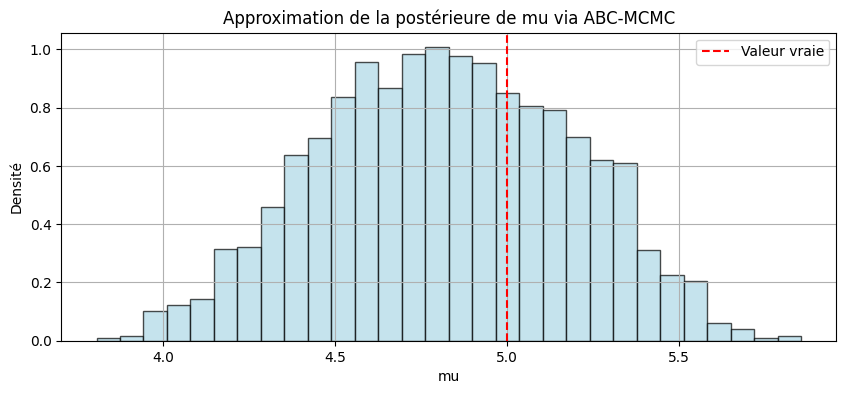

Nombre de paramètres acceptés : 9001 / 10000


In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Données simulées avec mu = 5
mu_true = 5
n_obs = 20
y_obs = np.random.normal(loc=mu_true, scale=1, size=n_obs)

# Statistique observée
s_obs = np.mean(y_obs)
print(f"Statistique observée (moyenne) : {s_obs:.3f}")
# Hyperparamètres
T = 10000                      # Nombre d'itérations de la chaîne
epsilon = 0.5                  # Seuil de tolérance
proposal_sd = 0.5              # Écart-type de la proposition (mouvement de la chaîne)
prior_bounds = (0, 10)         # Support de la prior uniforme

# Initialisation
theta_chain = []
theta_current = np.random.uniform(*prior_bounds)
theta_chain.append(theta_current)

for t in range(T):
    # Proposer un nouveau paramètre
    theta_proposed = np.random.normal(loc=theta_current, scale=proposal_sd)
    
    # Vérifier que le paramètre proposé est dans le support de la prior
    if not (prior_bounds[0] <= theta_proposed <= prior_bounds[1]):
        theta_chain.append(theta_current)
        continue

    # Simuler des données avec le paramètre proposé
    y_sim = np.random.normal(loc=theta_proposed, scale=1, size=n_obs)
    s_sim = np.mean(y_sim)
    
    # Calculer la distance
    dist = abs(s_sim - s_obs)
    
    if dist < epsilon:
        # Prior uniforme : densité constante, donc le rapport est 1
        # q symétrique => le rapport des q vaut aussi 1
        # Donc probabilité d'acceptation = 1
        theta_current = theta_proposed
    
    # Ajouter le paramètre courant à la chaîne
    theta_chain.append(theta_current)
# Convertir en array
theta_chain = np.array(theta_chain)

# Supprimer le burn-in (ex: 1000 premières valeurs)
burn_in = 1000
samples = theta_chain[burn_in:]

plt.figure(figsize=(10, 4))
plt.hist(samples, bins=30, density=True, alpha=0.7, color='lightblue', edgecolor='k')
plt.axvline(mu_true, color='red', linestyle='--', label='Valeur vraie')
plt.title("Approximation de la postérieure de mu via ABC-MCMC")
plt.xlabel("mu")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()
print(f"Nombre de paramètres acceptés : {len(samples)} / {T}")